In [1]:
!pip install yfinance pandas_datareader scikit-learn matplotlib
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# Récupérer les données
sp500_data = yf.download('^GSPC', start='2018-01-01', end='2023-12-31')
vix_data = yf.download('^VIX', start='2018-01-01', end='2023-12-31')
interest_rate_data = yf.download('^IRX', start='2018-01-01', end='2023-12-31')
cpi_data = web.DataReader('CPIAUCSL', 'fred', start='2018-01-01', end='2023-12-31')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:

# Fusionner les données
merged_data = pd.concat([sp500_data['Close'],sp500_data['Volume'], vix_data['Close'], interest_rate_data['Close'], cpi_data], axis=1)
merged_data.columns = ['SP500_Close','SP500_Volume', 'VIX_Close', 'Interest_Rate', 'CPI_Close']

merged_data.head(50)


,SP500_Close,SP500_Volume,VIX_Close,Interest_Rate,CPI_Close
2018-01-01,NaN,NaN,NaN,NaN,248.859
2018-01-02,2695.810059,3.397430e+09,9.770000,1.378,NaN
2018-01-03,2713.060059,3.544030e+09,9.150000,1.370,NaN
2018-01-04,2723.989990,3.697340e+09,9.220000,1.370,NaN
2018-01-05,2743.149902,3.239280e+09,9.220000,1.370,NaN
2018-01-08,2747.709961,3.246160e+09,9.520000,1.380,NaN
2018-01-09,2751.290039,3.467460e+09,10.080000,1.415,NaN
2018-01-10,2748.229980,3.579900e+09,9.820000,1.395,NaN
2018-01-11,2767.560059,3.645690e+09,9.880000,1.403,NaN
2018-01-12,2786.239990,3.587220e+09,10.160000,1.410,NaN


In [5]:
from google.colab import files
merged_data.to_csv("Database.csv")
files.download("Database.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
merged_data['CPI_Close'] = merged_data['CPI_Close'].fillna(method='ffill')


<ipython-input-6-86fbacbc6fbe>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['CPI_Close'] = merged_data['CPI_Close'].fillna(method='ffill')


In [7]:
merged_data.head(50)

,SP500_Close,SP500_Volume,VIX_Close,Interest_Rate,CPI_Close
2018-01-01,NaN,NaN,NaN,NaN,248.859
2018-01-02,2695.810059,3.397430e+09,9.770000,1.378,248.859
2018-01-03,2713.060059,3.544030e+09,9.150000,1.370,248.859
2018-01-04,2723.989990,3.697340e+09,9.220000,1.370,248.859
2018-01-05,2743.149902,3.239280e+09,9.220000,1.370,248.859
2018-01-08,2747.709961,3.246160e+09,9.520000,1.380,248.859
2018-01-09,2751.290039,3.467460e+09,10.080000,1.415,248.859
2018-01-10,2748.229980,3.579900e+09,9.820000,1.395,248.859
2018-01-11,2767.560059,3.645690e+09,9.880000,1.403,248.859
2018-01-12,2786.239990,3.587220e+09,10.160000,1.410,248.859


In [8]:

# Calcul des log return
merged_data['SP500_Log_Return'] = np.log(merged_data['SP500_Close'] / merged_data['SP500_Close'].shift(1))
merged_data['VIX_Log_Return'] = np.log(merged_data['VIX_Close'] / merged_data['VIX_Close'].shift(1))
merged_data['Interest_Rate_Log_Return'] = np.log(merged_data['Interest_Rate'] / merged_data['Interest_Rate'].shift(1))
merged_data.dropna(inplace=True)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
merged_data.head(50)

,SP500_Close,SP500_Volume,VIX_Close,Interest_Rate,CPI_Close,SP500_Log_Return,VIX_Log_Return,Interest_Rate_Log_Return
2018-01-03,2713.060059,3.544030e+09,9.150000,1.370,248.859,0.006378,-0.065563,-0.005822
2018-01-04,2723.989990,3.697340e+09,9.220000,1.370,248.859,0.004021,0.007621,0.000000
2018-01-05,2743.149902,3.239280e+09,9.220000,1.370,248.859,0.007009,0.000000,0.000000
2018-01-08,2747.709961,3.246160e+09,9.520000,1.380,248.859,0.001661,0.032020,0.007273
2018-01-09,2751.290039,3.467460e+09,10.080000,1.415,248.859,0.001302,0.057158,0.025046
2018-01-10,2748.229980,3.579900e+09,9.820000,1.395,248.859,-0.001113,-0.026132,-0.014235
2018-01-11,2767.560059,3.645690e+09,9.880000,1.403,248.859,0.007009,0.006091,0.005718
2018-01-12,2786.239990,3.587220e+09,10.160000,1.410,248.859,0.006727,0.027946,0.004977
2018-01-16,2776.419922,4.362880e+09,11.660000,1.395,248.859,-0.003531,0.137706,-0.010695
2018-01-17,2802.560059,3.790340e+09,11.910000,1.415,248.859,0.009371,0.021214,0.014235


In [10]:
def adf_test_all_columns(dataframe):

    results = ""
    for column in dataframe.select_dtypes(include=['float64', 'int64']).columns:
        series = dataframe[column].dropna()
        try:
            result = adfuller(series)
            results += f"Test ADF pour {column}:\n"
            results += f"Statistique ADF: {result[0]}\n"
            results += f"p-value: {result[1]}\n"
            results += "Hypothèse nulle: La série a une racine unitaire (non stationnaire)\n"
            results += "Conclusion: La série est stationnaire si p-value < 0.05\n\n"
        except Exception as e:
            results += f"Test ADF pour {column}: Erreur - {e}\n\n"
    return results

# Exemple d'utilisation
adf_results = adf_test_all_columns(merged_data)
print(adf_results)

Test ADF pour SP500_Close:
Statistique ADF: -0.8412601210159901
p-value: 0.8067008597305256
Hypothèse nulle: La série a une racine unitaire (non stationnaire)
Conclusion: La série est stationnaire si p-value < 0.05

Test ADF pour SP500_Volume:
Statistique ADF: -4.928758927801106
p-value: 3.0647204664127164e-05
Hypothèse nulle: La série a une racine unitaire (non stationnaire)
Conclusion: La série est stationnaire si p-value < 0.05

Test ADF pour VIX_Close:
Statistique ADF: -4.516317093220167
p-value: 0.00018371278553912032
Hypothèse nulle: La série a une racine unitaire (non stationnaire)
Conclusion: La série est stationnaire si p-value < 0.05

Test ADF pour Interest_Rate:
Statistique ADF: 0.19577398872891075
p-value: 0.972023571302593
Hypothèse nulle: La série a une racine unitaire (non stationnaire)
Conclusion: La série est stationnaire si p-value < 0.05

Test ADF pour CPI_Close:
Statistique ADF: 1.0270260514005567
p-value: 0.9945430761104811
Hypothèse nulle: La série a une racine un

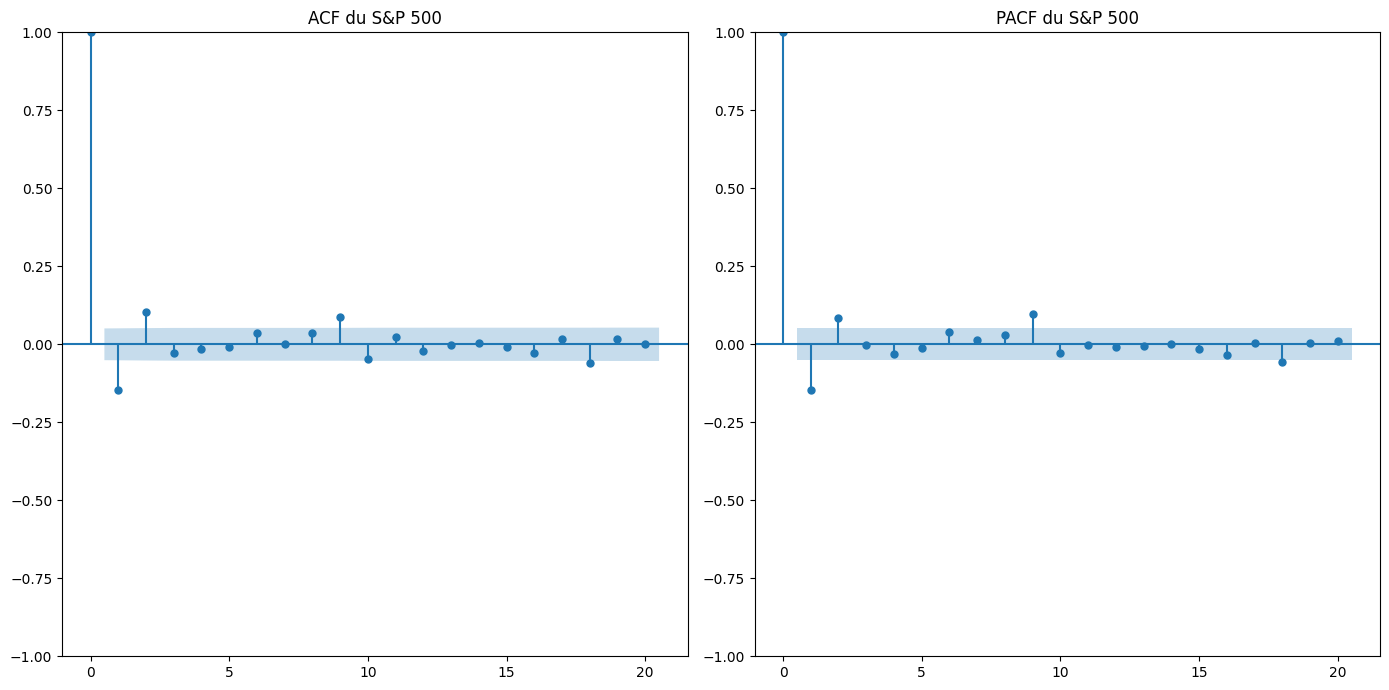

In [11]:
# ACF et PACF
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plot_acf(merged_data['SP500_Log_Return'], lags=20, ax=plt.gca())  # Lags réduit à 20
plt.title('ACF du S&P 500')
plt.subplot(1, 2, 2)
plot_pacf(merged_data['SP500_Log_Return'], lags=20, ax=plt.gca())  # Lags réduit à 20
plt.title('PACF du S&P 500')
plt.tight_layout()
plt.show()

In [12]:
#moyenne mobile simple (SMA)
merged_data['SMA_10'] = merged_data['SP500_Close'].rolling(window=10).mean()
merged_data['SMA_50'] = merged_data['SP500_Close'].rolling(window=50).mean()
#moyenne mobile exponentielle (EMA)
merged_data['EMA_10'] = merged_data['SP500_Close'].ewm(span=10, adjust=False).mean()


In [13]:
merged_data.head(50)

,SP500_Close,SP500_Volume,VIX_Close,Interest_Rate,CPI_Close,SP500_Log_Return,VIX_Log_Return,Interest_Rate_Log_Return,SMA_10,SMA_50,EMA_10
2018-01-03,2713.060059,3.544030e+09,9.150000,1.370,248.859,0.006378,-0.065563,-0.005822,NaN,NaN,2713.060059
2018-01-04,2723.989990,3.697340e+09,9.220000,1.370,248.859,0.004021,0.007621,0.000000,NaN,NaN,2715.047319
2018-01-05,2743.149902,3.239280e+09,9.220000,1.370,248.859,0.007009,0.000000,0.000000,NaN,NaN,2720.156880
2018-01-08,2747.709961,3.246160e+09,9.520000,1.380,248.859,0.001661,0.032020,0.007273,NaN,NaN,2725.166531
2018-01-09,2751.290039,3.467460e+09,10.080000,1.415,248.859,0.001302,0.057158,0.025046,NaN,NaN,2729.916259
2018-01-10,2748.229980,3.579900e+09,9.820000,1.395,248.859,-0.001113,-0.026132,-0.014235,NaN,NaN,2733.246027
2018-01-11,2767.560059,3.645690e+09,9.880000,1.403,248.859,0.007009,0.006091,0.005718,NaN,NaN,2739.484942
2018-01-12,2786.239990,3.587220e+09,10.160000,1.410,248.859,0.006727,0.027946,0.004977,NaN,NaN,2747.985860
2018-01-16,2776.419922,4.362880e+09,11.660000,1.395,248.859,-0.003531,0.137706,-0.010695,NaN,NaN,2753.155689
2018-01-17,2802.560059,3.790340e+09,11.910000,1.415,248.859,0.009371,0.021214,0.014235,2756.020996,NaN,2762.138302


In [14]:
#MACD
ema_12 = merged_data['SP500_Close'].ewm(span=12, adjust=False).mean()
ema_26 = merged_data['SP500_Close'].ewm(span=26, adjust=False).mean()

merged_data['MACD'] = ema_12 - ema_26
merged_data['Signal_Line'] = merged_data['MACD'].ewm(span=9, adjust=False).mean()


In [15]:
merged_data.head(30)

,SP500_Close,SP500_Volume,VIX_Close,Interest_Rate,CPI_Close,SP500_Log_Return,VIX_Log_Return,Interest_Rate_Log_Return,SMA_10,SMA_50,EMA_10,MACD,Signal_Line
2018-01-03,2713.060059,3.544030e+09,9.150000,1.370,248.859,0.006378,-0.065563,-0.005822,NaN,NaN,2713.060059,0.000000,0.000000
2018-01-04,2723.989990,3.697340e+09,9.220000,1.370,248.859,0.004021,0.007621,0.000000,NaN,NaN,2715.047319,0.871903,0.174381
2018-01-05,2743.149902,3.239280e+09,9.220000,1.370,248.859,0.007009,0.000000,0.000000,NaN,NaN,2720.156880,3.073508,0.754206
2018-01-08,2747.709961,3.246160e+09,9.520000,1.380,248.859,0.001661,0.032020,0.007273,NaN,NaN,2725.166531,5.127152,1.628795
2018-01-09,2751.290039,3.467460e+09,10.080000,1.415,248.859,0.001302,0.057158,0.025046,NaN,NaN,2729.916259,6.963294,2.695695
2018-01-10,2748.229980,3.579900e+09,9.820000,1.395,248.859,-0.001113,-0.026132,-0.014235,NaN,NaN,2733.246027,8.078405,3.772237
2018-01-11,2767.560059,3.645690e+09,9.880000,1.403,248.859,0.007009,0.006091,0.005718,NaN,NaN,2739.484942,10.402007,5.098191
2018-01-12,2786.239990,3.587220e+09,10.160000,1.410,248.859,0.006727,0.027946,0.004977,NaN,NaN,2747.985860,13.594088,6.797370
2018-01-16,2776.419922,4.362880e+09,11.660000,1.395,248.859,-0.003531,0.137706,-0.010695,NaN,NaN,2753.155689,15.156720,8.469240
2018-01-17,2802.560059,3.790340e+09,11.910000,1.415,248.859,0.009371,0.021214,0.014235,2756.020996,NaN,2762.138302,18.293532,10.434099


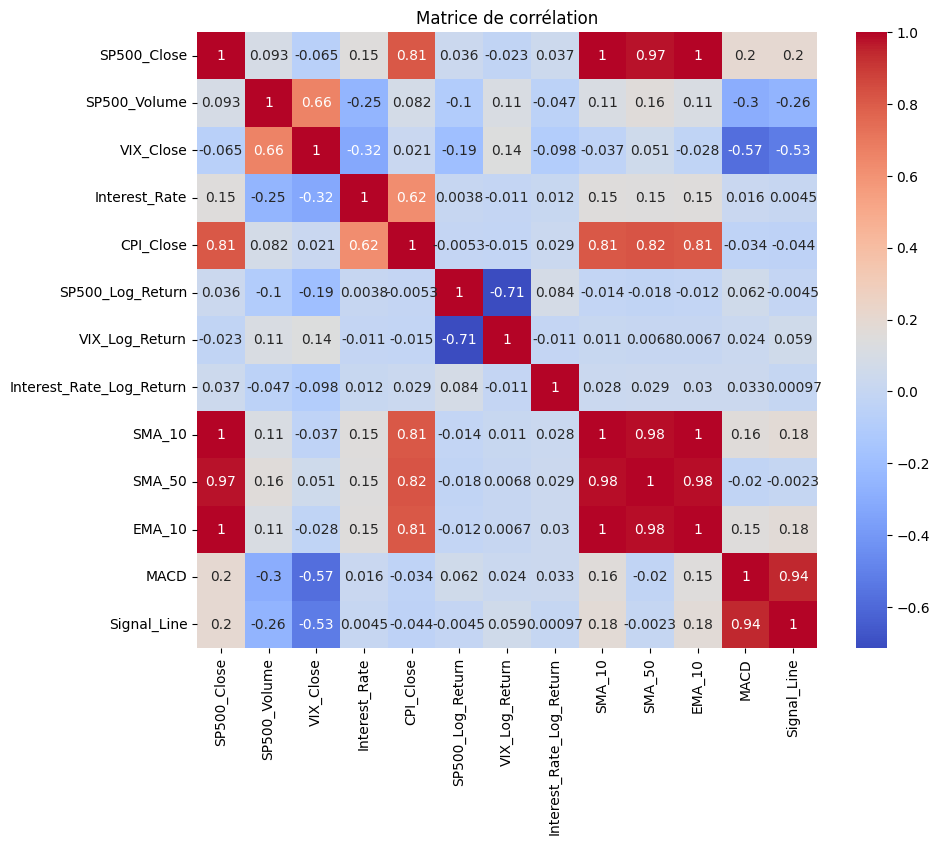

In [16]:
# Matrice de corrélation
correlation_matrix = merged_data.corr()

# Afficher les corrélations avec la cible
correlation_matrix['SP500_Close'].sort_values(ascending=False)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

In [17]:
merged_data.columns

Index(['SP500_Close', 'SP500_Volume', 'VIX_Close', 'Interest_Rate',
       'CPI_Close', 'SP500_Log_Return', 'VIX_Log_Return',
       'Interest_Rate_Log_Return', 'SMA_10', 'SMA_50', 'EMA_10', 'MACD',
       'Signal_Line'],
      dtype='object')

In [18]:
merged_data.head(50)

,SP500_Close,SP500_Volume,VIX_Close,Interest_Rate,CPI_Close,SP500_Log_Return,VIX_Log_Return,Interest_Rate_Log_Return,SMA_10,SMA_50,EMA_10,MACD,Signal_Line
2018-01-03,2713.060059,3.544030e+09,9.150000,1.370,248.859,0.006378,-0.065563,-0.005822,NaN,NaN,2713.060059,0.000000,0.000000
2018-01-04,2723.989990,3.697340e+09,9.220000,1.370,248.859,0.004021,0.007621,0.000000,NaN,NaN,2715.047319,0.871903,0.174381
2018-01-05,2743.149902,3.239280e+09,9.220000,1.370,248.859,0.007009,0.000000,0.000000,NaN,NaN,2720.156880,3.073508,0.754206
2018-01-08,2747.709961,3.246160e+09,9.520000,1.380,248.859,0.001661,0.032020,0.007273,NaN,NaN,2725.166531,5.127152,1.628795
2018-01-09,2751.290039,3.467460e+09,10.080000,1.415,248.859,0.001302,0.057158,0.025046,NaN,NaN,2729.916259,6.963294,2.695695
2018-01-10,2748.229980,3.579900e+09,9.820000,1.395,248.859,-0.001113,-0.026132,-0.014235,NaN,NaN,2733.246027,8.078405,3.772237
2018-01-11,2767.560059,3.645690e+09,9.880000,1.403,248.859,0.007009,0.006091,0.005718,NaN,NaN,2739.484942,10.402007,5.098191
2018-01-12,2786.239990,3.587220e+09,10.160000,1.410,248.859,0.006727,0.027946,0.004977,NaN,NaN,2747.985860,13.594088,6.797370
2018-01-16,2776.419922,4.362880e+09,11.660000,1.395,248.859,-0.003531,0.137706,-0.010695,NaN,NaN,2753.155689,15.156720,8.469240
2018-01-17,2802.560059,3.790340e+09,11.910000,1.415,248.859,0.009371,0.021214,0.014235,2756.020996,NaN,2762.138302,18.293532,10.434099


In [19]:

# Sélection des colonnes nécessaires pour le modèle
features = ['VIX_Close', 'Interest_Rate',
       'CPI_Close','SMA_10', 'SMA_50','VIX_Log_Return',
       'Interest_Rate_Log_Return' , 'MACD', 'Signal_Line']
data_pred = merged_data.dropna(subset=features + ['SP500_Log_Return'])  # Supprimer les lignes avec des valeurs manquantes


X = data_pred[features]  # Variables explicatives
y = data_pred['SP500_Log_Return']  # Variable cible (rendements)
print("X shape:", X.shape)
print("y shape:", y.shape)
print("X sample:\n", X.head())
print("y sample:\n", y.head())

X shape: (1434, 9)
y shape: (1434,)
X sample:
             VIX_Close  Interest_Rate  CPI_Close       SMA_10       SMA_50  \
2018-03-15  16.590000          1.733    249.577  2743.779028  2748.069600   
2018-03-16  15.800000          1.738    249.577  2749.855029  2748.848599   
2018-03-19  19.020000          1.728    249.577  2749.053027  2748.627197   
2018-03-20  18.200001          1.758    249.577  2747.935010  2748.102998   
2018-03-21  17.860001          1.710    249.577  2746.447998  2747.387397   

            VIX_Log_Return  Interest_Rate_Log_Return      MACD  Signal_Line  
2018-03-15       -0.037852                  0.008693  7.108236     1.791935  
2018-03-16       -0.048790                  0.002881  7.156412     2.864831  
2018-03-19        0.185481                 -0.005770  3.994305     3.090726  
2018-03-20       -0.044069                  0.017212  1.792036     2.830988  
2018-03-21       -0.018858                 -0.027683 -0.353469     2.194097  
y sample:
 2018-03-15 

Linear Regression MAE: 0.006399730255901294
Linear Regression RMSE: 0.00845394690435741
Linear Regression R2: 0.20474574813847923
Random Forest MAE: 0.005909809400561615
Random Forest RMSE: 0.007708688180542303
Random Forest R2: 0.3387770401804189


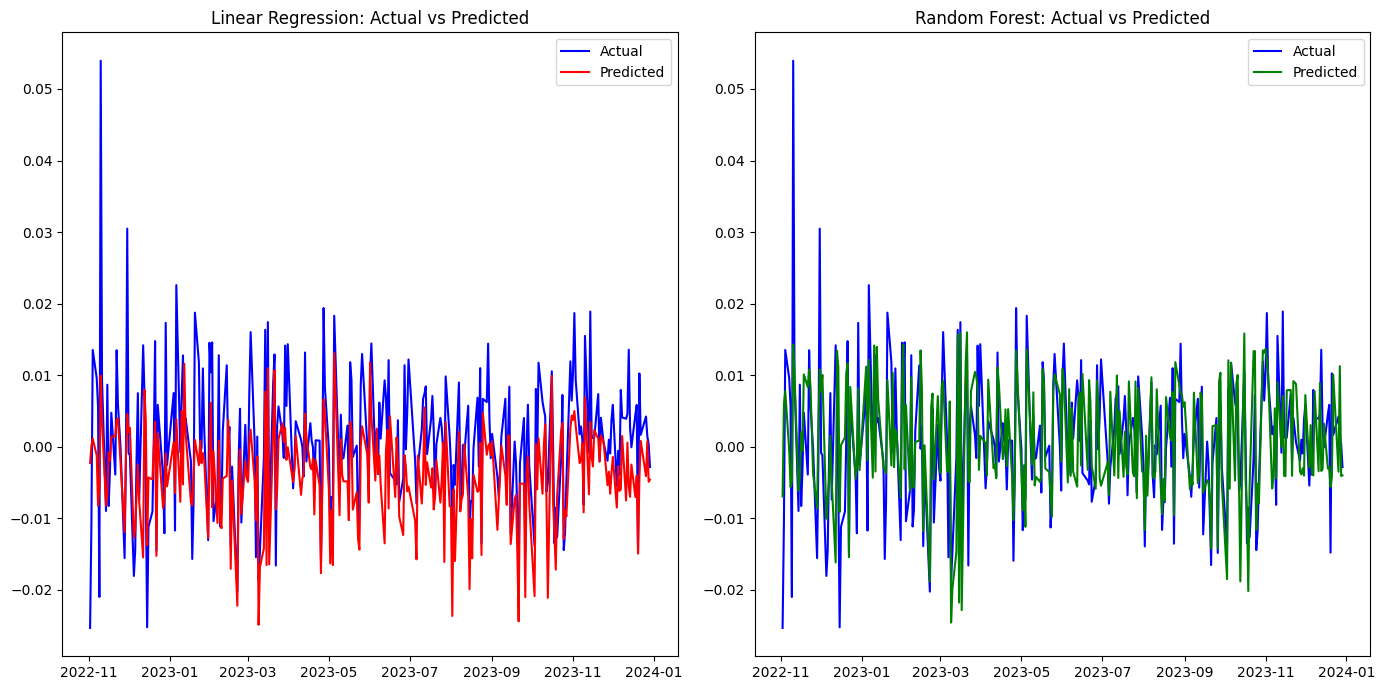

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Séparation des données en 80% d'entraînement et 20% de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Modèle de régression linéaire
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Erreurs
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression R2: {lr_r2}")

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R2: {rf_r2}")

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, lr_predictions, label='Predicted', color='red')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, rf_predictions, label='Predicted', color='green')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()
plt.tight_layout()
#plt.savefig('/content/predictions_comparison.png')
plt.show()
#from google.colab import files
#files.download('/content/predictions_comparison.png')



In [21]:
def rolling_window_cv(data, features, target, model):
    tscv = TimeSeriesSplit(n_splits=5)
    for train_idx, test_idx in tscv.split(data):
        train, test = data.iloc[train_idx], data.iloc[test_idx]
        X_train, y_train = train[features], train[target]
        X_test, y_test = test[features], test[target]

        # Entraîner et prédire
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calcul des métriques
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        accuracy = accuracy_score((y_test > 0).astype(int), (y_pred > 0).astype(int))

        print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, Accuracy: {accuracy:.4f}")

# Définir les colonnes
# Liste des features et de la cible
features = ['VIX_Close', 'Interest_Rate',
       'CPI_Close','SMA_10', 'SMA_50','VIX_Log_Return',
       'Interest_Rate_Log_Return' , 'MACD', 'Signal_Line']
target = 'SP500_Log_Return'
# Créer un modèle et valider
model = LinearRegression()
data_pred = merged_data.dropna(subset=features + ['SP500_Log_Return'])  # Supprimer les lignes avec des valeurs manquantes
print("X shape:", data_pred.shape)
rolling_window_cv(data_pred, features, target, model)

X shape: (1434, 13)
MAE: 0.0031, RMSE: 0.0041, Accuracy: 0.8243
MAE: 0.0106, RMSE: 0.0171, Accuracy: 0.6987
MAE: 0.0064, RMSE: 0.0076, Accuracy: 0.7364
MAE: 0.0087, RMSE: 0.0113, Accuracy: 0.7531
MAE: 0.0047, RMSE: 0.0063, Accuracy: 0.7197


In [22]:
model = RandomForestRegressor()
data_pred = merged_data.dropna(subset=features + ['SP500_Log_Return'])  # Supprimer les lignes avec des valeurs manquantes
print("X shape:", data_pred.shape)
rolling_window_cv(data_pred, features, target, model)

X shape: (1434, 13)
MAE: 0.0032, RMSE: 0.0043, Accuracy: 0.7992
MAE: 0.0098, RMSE: 0.0168, Accuracy: 0.7908
MAE: 0.0039, RMSE: 0.0050, Accuracy: 0.8201
MAE: 0.0083, RMSE: 0.0110, Accuracy: 0.7490
MAE: 0.0051, RMSE: 0.0064, Accuracy: 0.7280
